In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


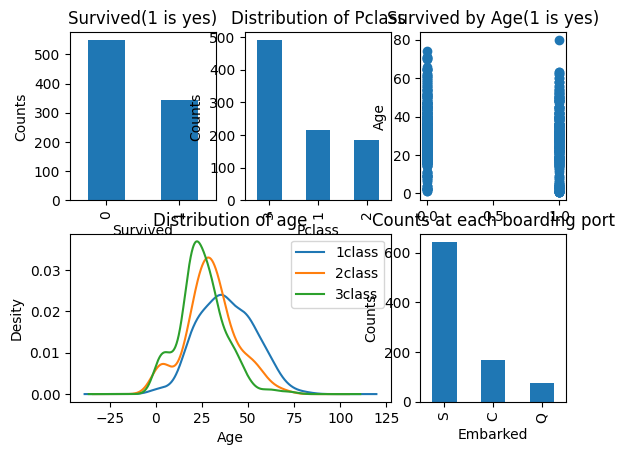

In [3]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived(1 is yes)')
plt.ylabel('Counts')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title('Distribution of Pclass')
plt.ylabel('Counts')

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.title('Survived by Age(1 is yes)')
plt.ylabel('Age')

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Desity')
plt.legend(('1class','2class','3class'),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('Counts at each boarding port')
plt.ylabel('Counts')

plt.show()

<Figure size 640x480 with 0 Axes>

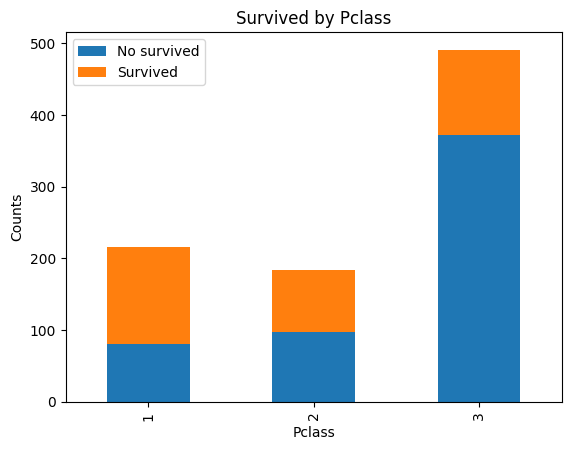

In [4]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df=pd.DataFrame({'No survived':Survived_0,'Survived':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('Survived by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.show()

<Figure size 640x480 with 0 Axes>

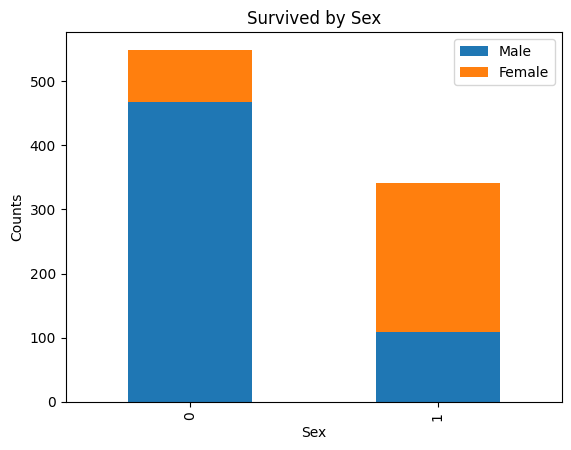

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

df=pd.DataFrame({'Male':Survived_m,'Female':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

<Figure size 640x480 with 0 Axes>

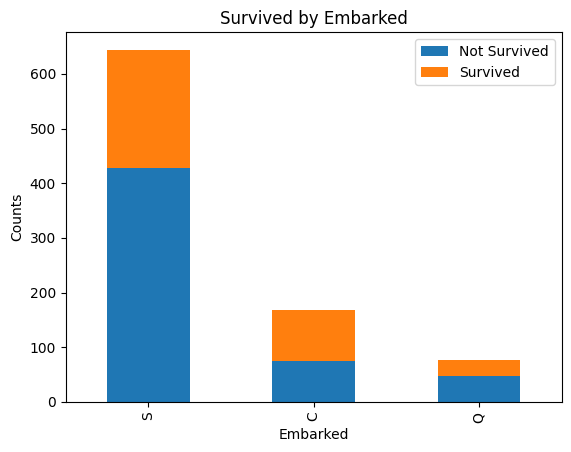

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

df=pd.DataFrame({'Not Survived':Survived_0,'Survived':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('Survived by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.show()

<Figure size 640x480 with 0 Axes>

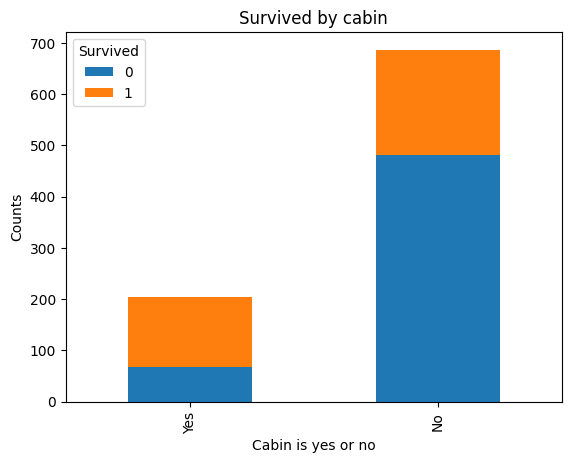

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()

df=pd.DataFrame({'Yes':Survived_cabin,'No':Survived_nocabin}).transpose()
df.plot(kind='bar',stacked=True)
plt.title('Survived by cabin')
plt.xlabel('Cabin is yes or no')
plt.ylabel('Counts')
plt.show()

In [9]:
for dataset in data_train:
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype(int)
    title_mapping = {'Mr':1,'Master':2,"Mrs":3,'Miss':4,'Rare':5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

drop_elements = ['PassengerId','Name','Ticket','Cabin','SibSp']
train = data_train.drop(drop_elements,axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation')


TypeError: string indices must be integers, not 'str'

In [10]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    y=known_age[:,0]
    X=known_age[:,1:]
    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    predictedAges = rfr.predict(unknown_age[:,1::])
    df.loc[(df.Age.isnull()),'Age']=predictedAges
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df

data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [11]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [12]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')

df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,True,False,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,False,True,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,True,False,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,False,True,False,False,True,True,False,True,False,False
4,5,0,35.0,0,0,8.0500,True,False,False,False,True,False,True,False,False,True


In [13]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1),age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1),age_scale_param)
df.head

<bound method NDFrame.head of      PassengerId  Survived        Age  SibSp  Parch     Fare  Cabin_No  \
0              1         0  22.000000      1      0   7.2500      True   
1              2         1  38.000000      1      0  71.2833     False   
2              3         1  26.000000      0      0   7.9250      True   
3              4         1  35.000000      1      0  53.1000     False   
4              5         0  35.000000      0      0   8.0500      True   
..           ...       ...        ...    ...    ...      ...       ...   
886          887         0  27.000000      0      0  13.0000      True   
887          888         1  19.000000      0      0  30.0000     False   
888          889         0  16.185117      1      2  23.4500      True   
889          890         1  26.000000      0      0  30.0000     False   
890          891         0  32.000000      0      0   7.7500      True   

     Cabin_Yes  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  \
0    

In [14]:
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
y = train_np[:,0]
# y is of type object, so sklearn cannot recognize its type
y=y.astype('int')
X = train_np[:,1:]
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l1',tol=1e-6)
clf.fit(X,y)


LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

In [15]:
# preprocess test data
data_test=pd.read_csv('test.csv')
data_test.loc[(data_test.Fare.isnull()),'Fare']=0

tmp_df=data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age']=predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'],prefix='Pclass')

df_test = pd.concat([data_test,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df_test['Age_Scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1),age_scale_param)
df_test['Fare_Scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1),age_scale_param)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_Scaled,Fare_Scaled
0,892,34.5,0,0,7.8292,True,False,False,True,False,False,True,False,False,True,0.307526,-0.496637
1,893,47.0,1,0,7.0000,True,False,False,False,True,True,False,False,False,True,1.256242,-0.511497
2,894,62.0,0,0,9.6875,True,False,False,True,False,False,True,False,True,False,2.394702,-0.463335
3,895,27.0,0,0,8.6625,True,False,False,False,True,False,True,False,False,True,-0.261704,-0.481704
4,896,22.0,1,1,12.2875,True,False,False,False,True,True,False,False,False,True,-0.641190,-0.416740


In [17]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
result.to_csv('Submission.csv',index=False)

c:\Users\P3134679\OneDrive - Charter Communications\Desktop\Numpy_Project\study\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [18]:
pd.read_csv('Submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
pd.DataFrame({'columns':list(train_df.columns)[1:],
              'coef':list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.34423364268067413]
1,Parch,[-0.10491767914390246]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.90209093067467]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726031417847304]
7,Sex_female,[1.9565683231986828]
8,Sex_male,[-0.67741894448868]
9,Pclass_1,[0.34116727843303546]


In [ ]:
for file in os.listdir("file path"):
    # pdf file
    if file.endswith(".pdf"):
        # Create the file path by joining the directory path and the file name. The 'rb' mode is used to read the file in binary mode.
        pdf_file = open(os.path.join(pdf_dir, filename), 'rb')
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for i in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[i]
            text += page.extract_text()
        #Creates a new text file with the same name as the PDF file
        txt_filename = os.path.splitext(filename)[0] + '.txt'
        # Create the file path
        txt_file = open(os.path.join(pdf_dir, txt_filename), 'w')
        txt_file.write(text)
        pdf_file.close()
        txt_file.close()
    
    # html file
    if file.endswith(".html"):
        html_files = open(os.path.join(html_dir, filename), 'rb')
        for  textFile in  html_files :
        # Open and read the html file 
        html = open(html_files, 'r', encoding="utf-8").read()
        soup = BeautifulSoup(html, features='lxml')
        text = ''
        for word in soup:
            word = word.get_text()
        #Creates a new text file with the same name as the html file
        txt_filename = os.path.splitext(filename)[0] + '.txt'
        # Create the file path
        txt_file = open(os.path.join(html_dir, txt_filename), 'w')
        txt_file.write(word)
        html_file.close()
        txt_file.close()
        


    # word file
    if file.endswith(".doc"):
        word_files = open(os.path.join(word_dir, filename), 'rb')
        for  textFile in  word_files :
        # Create a Document object
        document = Document()
        # Load a Word document
        document.LoadFromFile(word_files)
        document_text = document.GetText()
        #Creates a new text file with the same name as the html file
        txt_filename = os.path.splitext(filename)[0] + '.txt'
        # Create the file path
        txt_file = open(os.path.join(html_dir, txt_filename), 'w')
        txt_file.write(document_text)
        word_files.close()
        txt_file.close()